In [94]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
import seaborn as sb
from sklearn.linear_model import LinearRegression

In [45]:
#Data cleaning

In [46]:
#load data

all_files = glob.glob("*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))

In [47]:
# drop columns
df = df.drop(['Unnamed: 7'], axis=1)

In [48]:
# drop rows
df = df[df.Player != "Player"]
df = df.drop_duplicates()

In [49]:
#data type conversion
for var in ['AV', 'Year', 'Age', 'Wt', '40YD', 'Vertical', 'BenchReps', 'Broad Jump', '3Cone', 'Shuttle']:
    df[var]=pd.to_numeric(df[var])


In [50]:
#height to cm
height = df["Height"].str.split('-',expand=True)
height[0] = pd.to_numeric(height[0])
height[1] = pd.to_numeric(height[1])
df["Height"]= 2.54*(12*height[0]+height[1])

In [51]:
#weight to kg
df["Wt"] = df["Wt"] * 0.45359237

In [52]:
#draft
draft=df["Drafted (tm/rnd/yr)"].str.split("/",expand=True)
draft[1]=pd.to_numeric(draft[1].str.strip(" thndstrd"))
draft[2]=pd.to_numeric(draft[2].str.strip(" thndstrdpick"))
draft[3]=pd.to_datetime(draft[3])
df["Drafted team"]=draft[0]
df["Drafted round"]=draft[1]
df["Drafted pick"]=draft[2]
df = df.drop(['Drafted (tm/rnd/yr)'], axis=1)


In [53]:
#same positions
df['Pos']=df['Pos'].replace(['OG','OT'],'OL')

In [54]:
#teams name changes
df['Drafted team']=df['Drafted team'].replace(['Washington Football Team','"Washington Redskins'],'"Washington Commanders')
df['Drafted team']=df['Drafted team'].replace(['St. Louis Rams'],'Los Angeles Rams')
df['Drafted team']=df['Drafted team'].replace(['Oakland Raiders'],'Las Vegas Raiders')
df['Drafted team']=df['Drafted team'].replace(['San Diego Chargers'],'Los Angeles Chargers')

In [55]:
#generate BMI
df["BMI"]=df['Wt']/(df['Height']/100)**2
df["BMI"]

0      28.974799
1      30.541004
2      26.304290
3      31.321871
4      29.497296
         ...    
198    30.650796
199    27.046212
200    29.552934
201    26.254616
202    25.463019
Name: BMI, Length: 3587, dtype: float64

In [56]:
df['AV']=df['AV'].fillna(0)

In [57]:
df['NoOfNan']=df.isnull().sum(axis=1)

In [14]:
#ANALYSIS

<AxesSubplot:xlabel='Drafted team'>

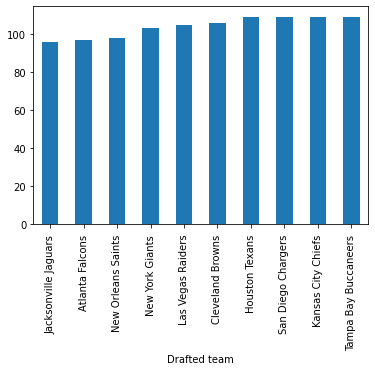

In [15]:
#avg draft position of NFL teams
df.groupby(df['Drafted team'])['Drafted pick'].mean().sort_values()[:10].plot(kind='bar')

<AxesSubplot:xlabel='Drafted team'>

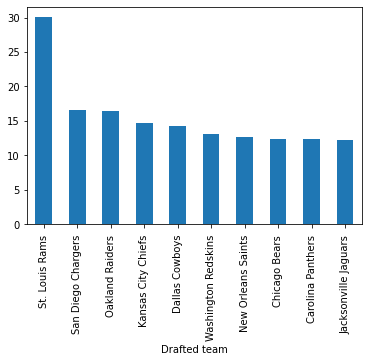

In [16]:
#avg AV of drafted players by NFL teams
df.groupby(df['Drafted team'])['AV'].mean().sort_values(ascending=False)[:10].plot(kind='bar')

<AxesSubplot:xlabel='Year'>

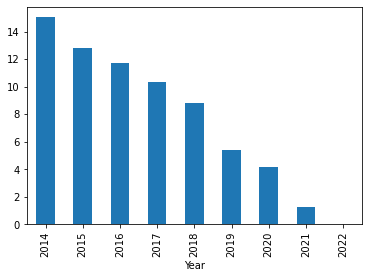

In [17]:
#avg Av by Year
df.groupby(df['Year'])['AV'].mean().sort_values(ascending=False)[:10].plot(kind='bar')

#AV should be taken separately for each year

In [18]:
#Correlation between AV and Drafted pick
df[(df['Year']!=2014)][['AV','Drafted pick']].corr()
#plt.scatter(df[(df['Year']==2014)]['AV'],df[(df['Year']==2014)]['Drafted pick'])

,AV,Drafted pick
AV,1.000000,-0.424616
Drafted pick,-0.424616,1.000000


In [19]:
#team has almost nothing to do with player AV, players with better draft positions will be better
np.corrcoef(df.groupby(df['Drafted team'])['Drafted pick'].mean(),df.groupby(df['Drafted team'])['AV'].mean())
#plt.scatter(df.groupby(df['Drafted team'])['Drafted pick'].mean(),df.groupby(df['Drafted team'])['AV'].mean())

array([[ 1.        , -0.18995488],
       [-0.18995488,  1.        ]])

In [ ]:
#combine
#positions

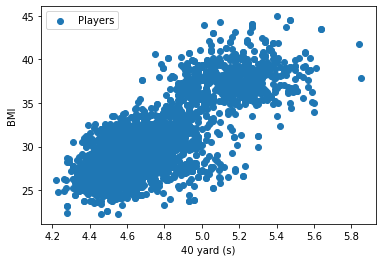

In [21]:
plt.scatter(df["40YD"],df["BMI"],label='Players')
plt.legend(loc='upper left')
plt.xlabel("40 yard (s)")
plt.ylabel("BMI")

plt.show()

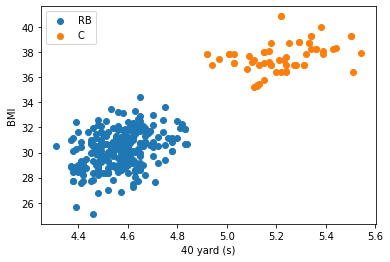

In [23]:
Rbs=df[(df['Pos']=='RB')]
Cs=df[(df['Pos']=='C')] 
plt.scatter(Rbs["40YD"],Rbs["BMI"],label='RB')
plt.scatter(Cs["40YD"],Cs["BMI"],label='C')
plt.legend(loc='upper left')
plt.xlabel("40 yard (s)")
plt.ylabel("BMI")
plt.show()

<AxesSubplot:>

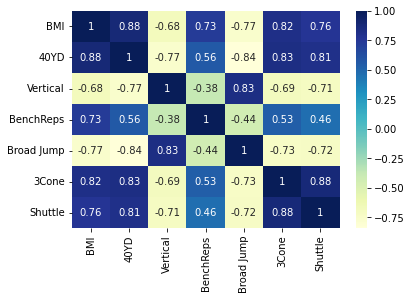

In [93]:
#BMI correlation with athletic measures
sb.heatmap(df[['BMI','40YD', 'Vertical', 'BenchReps', 'Broad Jump', '3Cone', 'Shuttle']].corr(),cmap="YlGnBu", annot=True)

<AxesSubplot:xlabel='Age'>

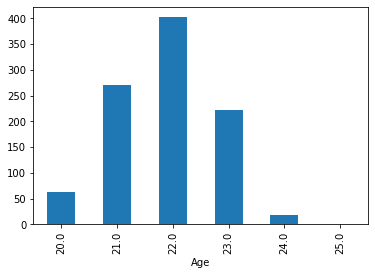

In [90]:
#player count in age groups
df.groupby(df["Age"])["Age"].count().plot(kind="bar")

Text(0, 0.5, 'Drafted pick')

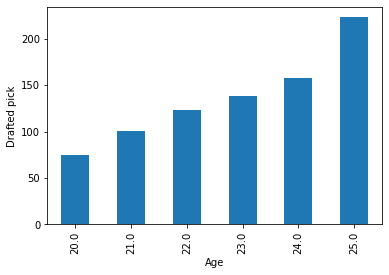

In [89]:
#draft position by age
df.groupby(df["Age"])["Drafted pick"].mean().plot(kind="bar")
plt.xlabel("Age")
plt.ylabel("Drafted pick")

In [60]:
#atlethic measures
#dropping rows that has missing values
df=df[(df["NoOfNan"]<1)]

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'40YD'}>,
        <AxesSubplot:title={'center':'Vertical'}>],
       [<AxesSubplot:title={'center':'BenchReps'}>,
        <AxesSubplot:title={'center':'Broad Jump'}>,
        <AxesSubplot:title={'center':'3Cone'}>,
        <AxesSubplot:title={'center':'Shuttle'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

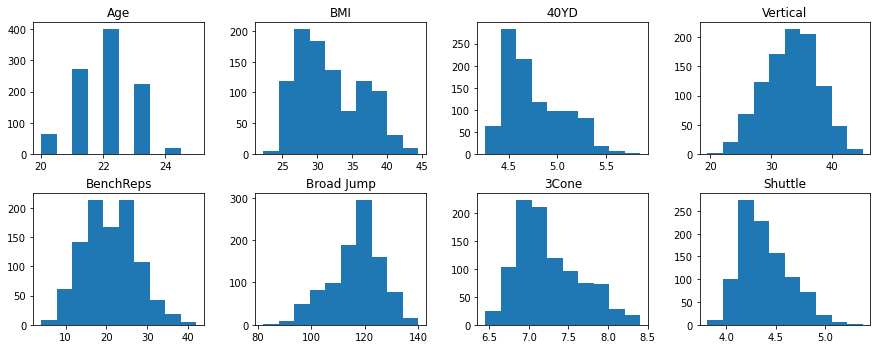

In [87]:
#check distribution
df[['Age','BMI','40YD', 'Vertical', 'BenchReps', 'Broad Jump', '3Cone', 'Shuttle']].hist(layout=(5,4),figsize=(15,15),grid=False)

In [114]:
#linear regression, BMI - athletic measures
x=df[['Age', '40YD', 'Vertical', 'BenchReps', 'Broad Jump', '3Cone', 'Shuttle']]
y=df['BMI']
model=LinearRegression().fit(x,y)
model.score(x,y)


0.8688789079030335

In [116]:
##linear regression, Drafted pick - athletic measures
x=df[['Age','Wt','Height', '40YD', 'Vertical', 'BenchReps', 'Broad Jump', '3Cone', 'Shuttle']]
y=df['Drafted pick']
model=LinearRegression().fit(x,y)
model.score(x,y)

0.183441849894459

In [ ]:
#WRs

<AxesSubplot:>

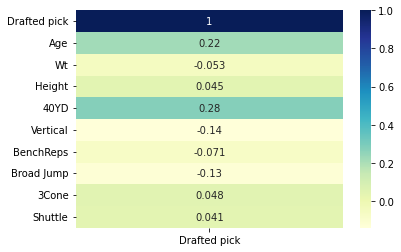

In [127]:
#correlation, Drafted pick - athletic measures
Wrs=df[(df['Pos']=='WR')]
sb.heatmap(Wrs[['Drafted pick','Age','Wt','Height','40YD', 'Vertical', 'BenchReps', 'Broad Jump', '3Cone', 'Shuttle']].corr()[['Drafted pick']],cmap="YlGnBu", annot=True)

In [118]:
##linear regression, Drafted pick - athletic measures
x=Wrs[['Age','Wt','Height', '40YD', 'Vertical', 'BenchReps', 'Broad Jump', '3Cone', 'Shuttle']]
y=Wrs['Drafted pick']
model=LinearRegression().fit(x,y)
model.score(x,y)

0.13817069458387077

In [128]:
x=Wrs[['Age','Wt','Height', '40YD']]
y=Wrs['Drafted pick']
model=LinearRegression().fit(x,y)
model.score(x,y)

0.1287179152852962

In [ ]:
#OL

<AxesSubplot:>

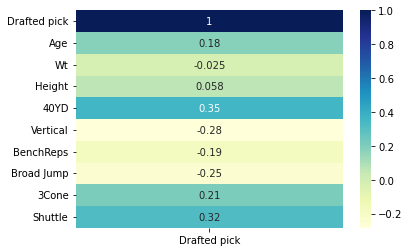

In [129]:
#correlation, Drafted pick - athletic measures
OLs=df[(df['Pos']=='OL')]
sb.heatmap(OLs[['Drafted pick','Age','Wt','Height','40YD', 'Vertical', 'BenchReps', 'Broad Jump', '3Cone', 'Shuttle']].corr()[['Drafted pick']],cmap="YlGnBu", annot=True)

In [130]:
##linear regression, Drafted pick - athletic measures
x=OLs[['Age','Wt','Height', '40YD', 'Vertical', 'BenchReps', 'Broad Jump', '3Cone', 'Shuttle']]
y=OLs['Drafted pick']
model=LinearRegression().fit(x,y)
model.score(x,y)

0.2524304583925365

In [131]:
##linear regression, Drafted pick - athletic measures
x=OLs[['Age','Wt', '40YD', 'Vertical', 'Shuttle']]
y=OLs['Drafted pick']
model=LinearRegression().fit(x,y)
model.score(x,y)

0.2462671409869701